In [2]:
library(ggplot2)
# library(ggthemes)
# library(viridis)

In [3]:
df1 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/covariate_table_eGenes.csv", row.names=1)

In [4]:
df2 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/covariate_table_repl_FDR10.csv", row.names=1)

In [11]:
df1[df1$n_covs==25,]

,n_genes,n_eGenes,method,n_covs
5,1421,167,PCA,25
10,1421,183,PEER,25
15,1421,154,MOFA,25
20,1421,112,MOFA-ns,25
25,1421,144,LDVAE,25


In [25]:
df2[df2$n_covs==25,c("n_replicated_m","method","n_covs")]

,n_replicated_m,method,n_covs
5,84,PCA,25
10,87,PEER,25
15,73,MOFA,25
20,72,MOFA-ns,25
25,73,LDVAE,25


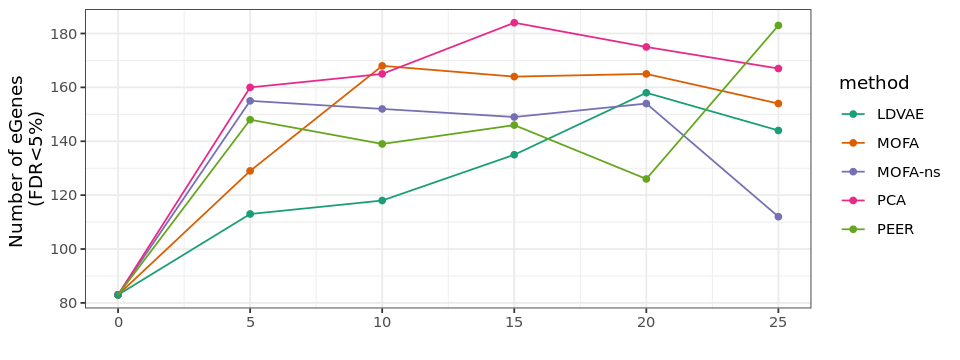

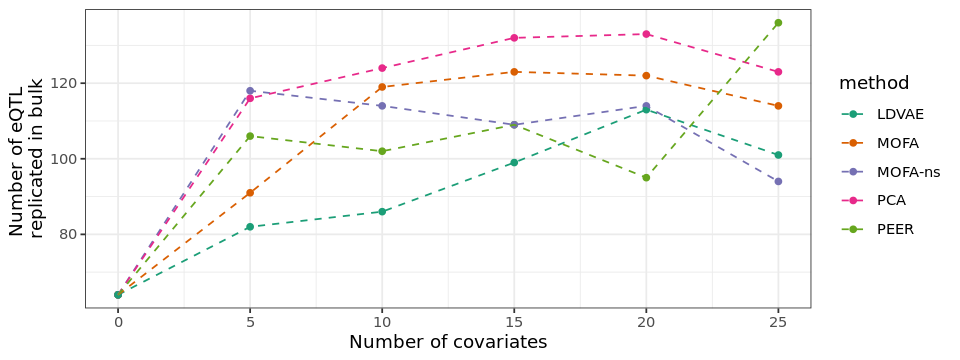

In [6]:
options(repr.plot.width = 8, repr.plot.height = 3)
##
p1 = ggplot(df1, aes(x = n_covs, y = n_eGenes, colour = method)) + 
geom_point() + geom_line() + theme_bw() + xlab("") + ylab("Number of eGenes \n(FDR<5%)") +
scale_color_brewer(palette = "Dark2")
##
p2 = ggplot(df2, aes(x = n_covs, y = n_replicated_a, colour = method)) + 
geom_point() + geom_line(lty = 2) + theme_bw() + xlab("Number of covariates") + ylab("Number of eQTL \nreplicated in bulk") +
scale_color_brewer(palette = "Dark2")
p1 
p2

In [7]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_eqtl/figures/"

In [8]:
pdf(paste0(fig_dir,"Fig4a.pdf"), width=8, height=3)
p1
dev.off()
pdf(paste0(fig_dir,"Fig4b.pdf"), width=8, height=3)
p2
dev.off()

png 
  2

png 
  2

In [30]:
df3 = df2[,c("n_eqtl_a","n_replicated_a","method","n_covs")]

In [31]:
df1$eqtl = "All"
colnames(df3)[1:2] = c("n_genes","n_eGenes")
df3$eqtl = "Replicated"

In [32]:
df4 = rbind(df1,df3)

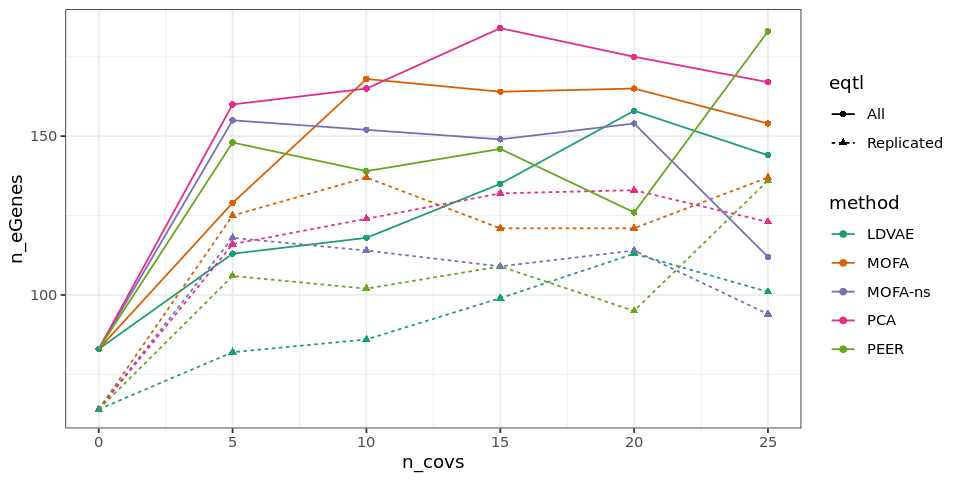

In [33]:
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(df4, aes(x = n_covs, y = n_eGenes, colour = method, linetype = eqtl, pch = eqtl)) + 
geom_point() + geom_line() + theme_bw() + scale_color_brewer(palette = "Dark2")